<a href="https://colab.research.google.com/github/potgieterphiline/UdemyTrainingCode/blob/main/SimpleLinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/sample_data/Advertising.csv')

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='sales'>

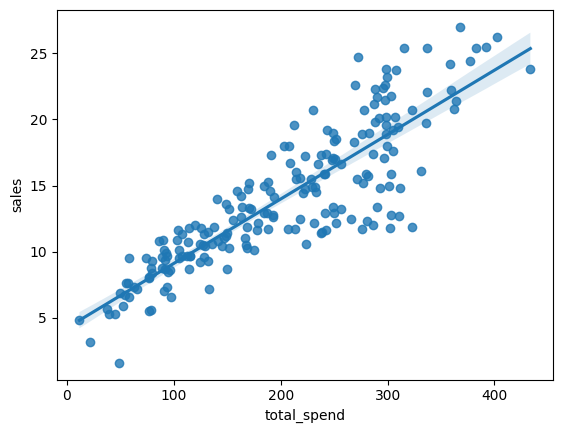

In [ ]:
sns.regplot(data=df,x='total_spend',y='sales')

In [ ]:
X = df['total_spend']
y = df['sales']

In [ ]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [ ]:
potential_spend = np.linspace(0,500,100)

In [ ]:
predict_sales = 0.04868788*potential_spend + 4.24302822

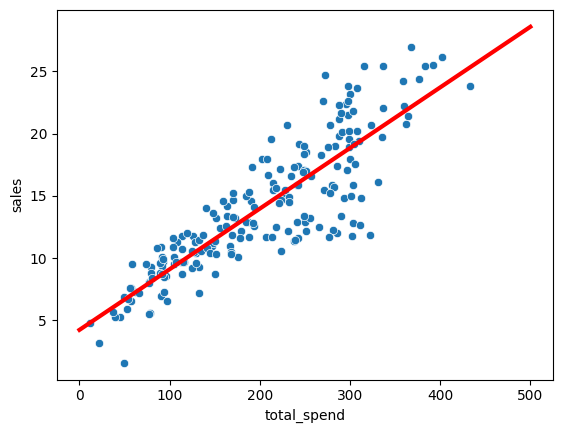

In [ ]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(potential_spend,predict_sales,color='red',linewidth=3)


In [ ]:
spend = 200
predicted_sales = 0.04868788*spend + 4.24302822
print(predicted_sales)

13.98060422


In [ ]:
np.polyfit(X,y,deg=3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [ ]:
pot_spend = np.linspace(0,500,100)

In [ ]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

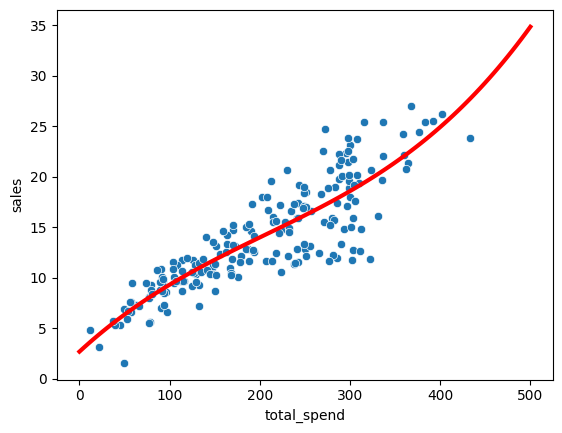

In [ ]:
sns.scatterplot(data=df,x='total_spend',y='sales')
plt.plot(pot_spend,pred_sales,color='red',linewidth=3)

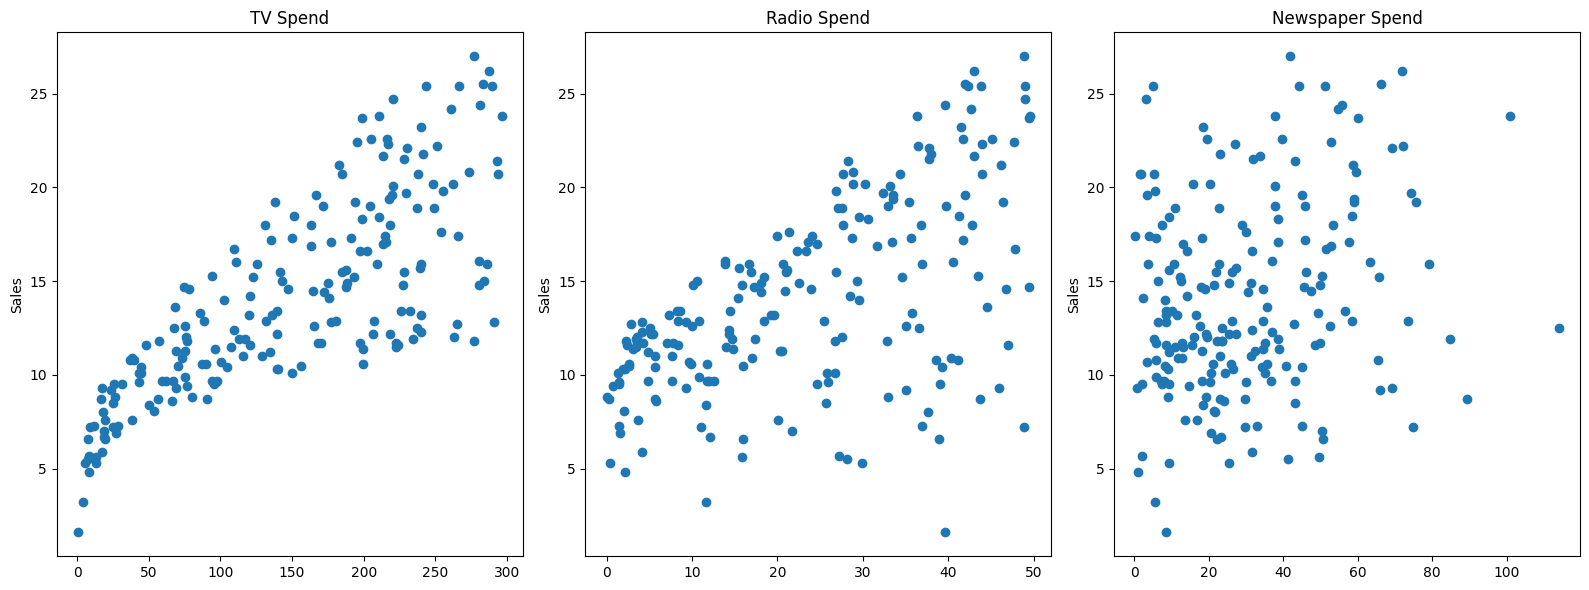

In [ ]:
fig,axes = plt.subplots(nrows=1, ncols = 3, figsize = (16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title('Radio Spend')
axes[1].set_ylabel('Sales')


axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title('Newspaper Spend')
axes[2].set_ylabel('Sales')

plt.tight_layout()

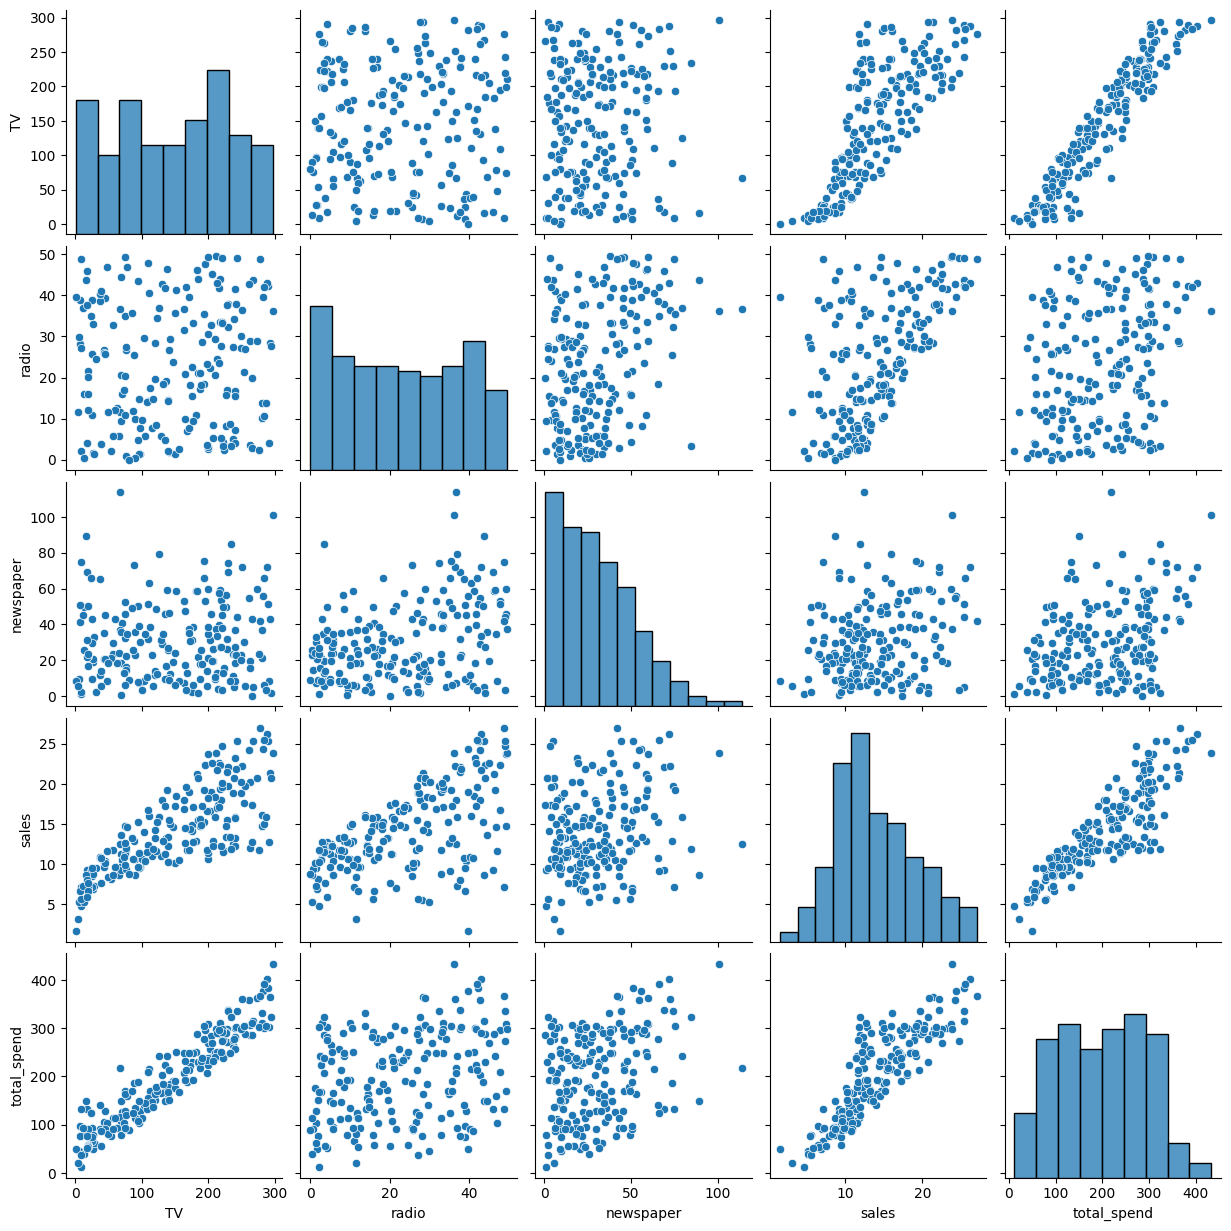

In [ ]:
sns.pairplot(df)

In [ ]:
X = df.drop('sales',axis=1)

In [ ]:
y = df['sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
X_train

,TV,radio,newspaper,total_spend
85,193.2,18.4,65.7,277.3
183,287.6,43.0,71.8,402.4
127,80.2,0.0,9.2,89.4
53,182.6,46.2,58.7,287.5
100,222.4,4.3,49.8,276.5
...,...,...,...,...
63,102.7,29.6,8.4,140.7
70,199.1,30.6,38.7,268.4
81,239.8,4.1,36.9,280.8
11,214.7,24.0,4.0,242.7


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df['sales'].mean()

np.float64(14.0225)

<Axes: xlabel='sales', ylabel='Count'>

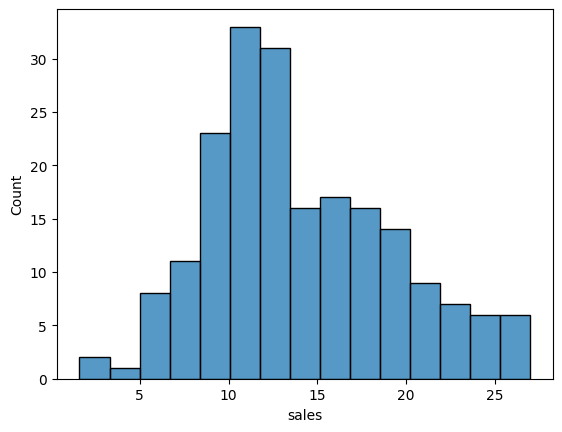

In [ ]:
sns.histplot(data=df, x='sales', bins = 15)

In [ ]:
mean_absolute_error(y_test,y_predict)

1.2137457736144814

In [ ]:
mean_squared_error(y_test,y_predict)

2.298716697886383

In [ ]:
np.sqrt(mean_squared_error(y_test,y_predict))

np.float64(1.5161519375993895)

In [ ]:
test_res = y_test - y_predict

In [ ]:
test_res

,sales
37,-1.041313
109,0.189374
31,0.451111
89,-0.308198
66,0.327143
119,-0.412483
54,-0.089925
74,-0.299540
145,0.524155
142,0.878058


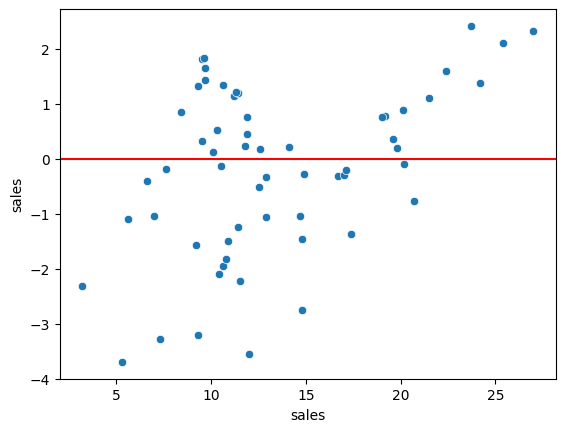

In [ ]:
sns.scatterplot(data=df, x=y_test, y=test_res)
plt.axhline(y=0,color='r')

(array([ 4.,  1.,  4.,  5.,  6., 10., 10.,  8.,  7.,  5.]),
 array([-3.69806574, -3.0870532 , -2.47604065, -1.86502811, -1.25401557,
        -0.64300303, -0.03199048,  0.57902206,  1.1900346 ,  1.80104714,
         2.41205969]),
 <BarContainer object of 10 artists>)

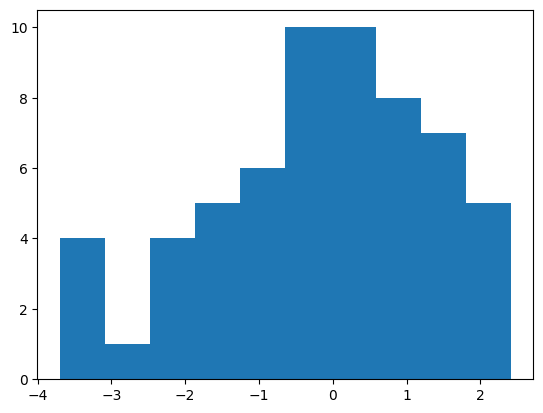

In [ ]:
plt.hist(test_res)

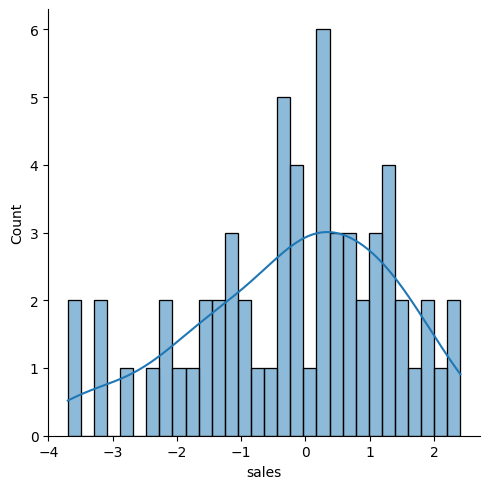

In [ ]:
sns.displot(test_res, kde=True, bins = 30)

In [ ]:
import scipy as sp

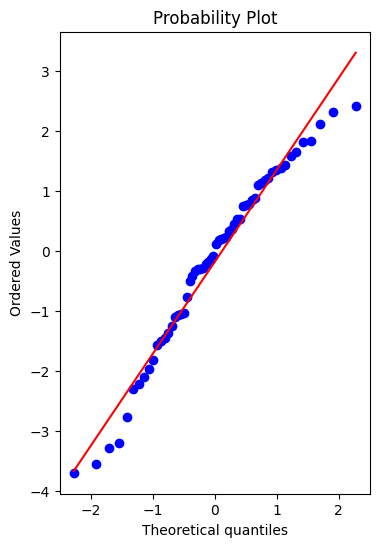

In [ ]:
fig, ax = plt.subplots(figsize =(4,6), dpi=100)

_ = sp.stats.probplot(test_res,plot=ax)

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y)

LinearRegression()

In [ ]:
final_model.coef_

array([-0.01254965,  0.13021572, -0.05935179,  0.05831429])

In [ ]:
X.head()

,TV,radio,newspaper,total_spend
0,230.1,37.8,69.2,337.1
1,44.5,39.3,45.1,128.9
2,17.2,45.9,69.3,132.4
3,151.5,41.3,58.5,251.3
4,180.8,10.8,58.4,250.0


In [ ]:
y_hat = final_model.predict(X)

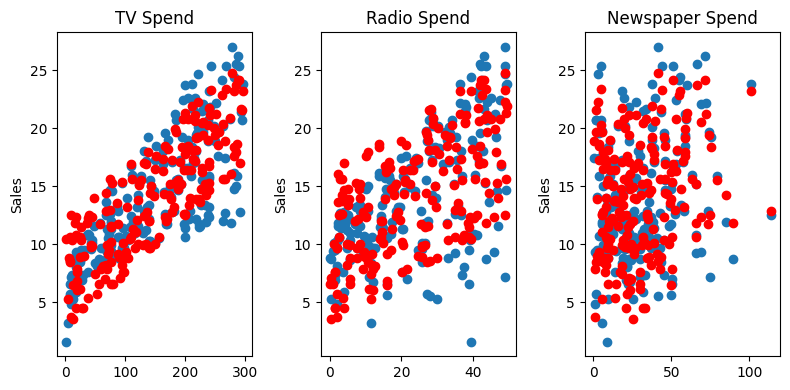

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(8,4))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title('Radio Spend')
axes[1].set_ylabel('Sales')


axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot (df['newspaper'],y_hat,'o',color='red')
axes[2].set_title('Newspaper Spend')
axes[2].set_ylabel('Sales')

plt.tight_layout()

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model,'Final_Simp_Lin_Reg.joblib')

['Final_Simp_Lin_Reg.joblib']

In [ ]:
loaded_model = load('Final_Simp_Lin_Reg.joblib')

In [ ]:
loaded_model.coef_

array([-0.01254965,  0.13021572, -0.05935179,  0.05831429])

In [ ]:
X.shape

(200, 4)

In [ ]:
campaign = [[149,22,12,184]]

In [ ]:
loaded_model.predict(campaign)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.95134629])